1.Data Import & Understanding 

A. Read the ‘Signals.csv’ as DataFrame and import required libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense ,BatchNormalization

In [2]:
df=pd.read_csv("/content/drive/MyDrive/NN Project Data - Signal.csv")

In [3]:
df.shape

(1599, 12)

In [4]:
df.head(10)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   
5          7.4         0.66         0.00          1.8        0.075   
6          7.9         0.60         0.06          1.6        0.069   
7          7.3         0.65         0.00          1.2        0.065   
8          7.8         0.58         0.02          2.0        0.073   
9          7.5         0.50         0.36          6.1        0.071   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   
5         13.0         40.0       0.9978         3.51          0.56   
6         15.0         59.0       0.9964         3.30          0.46   
7         15.0         21.0       0.9946         3.39          0.47   
8          9.0         18.0       0.9968         3.36          0.57   
9         17.0        102.0       0.9978         3.35          0.80   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5  
5           9.4                5  
6           9.4                5  
7          10.0                7  
8           9.5                7  
9          10.5                5

In [5]:
df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

B. Check for missing values and print percentage for each attribute.

In [6]:
null_counts = df.isnull().sum() 
print(null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


There is no Null Values in the data 

C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [7]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780         3.51          0.56   
11           17.0        102.0      0.99780         3.35          0.80   
27           10.0         37.0      0.99660         3.17          0.91   
40           12.0         87.0      0.99780         3.33          0.83   
65            4.0         11.0      0.99620         3.41          0.39   
...           ...          ...          ...          ...           ...   
1563         12.0         20.0      0.99546         3.29          0.54   
1564         12.0         20.0      0.99546         3.29          0.54   
1567         12.0         20.0      0.99546         3.29          0.54   
1581         24.0         32.0      0.99402         3.54          0.60   
1596         29.0         40.0      0.99574         3.42          0.75   

      Parameter 11  Signal_Strength  
4              9.4                5  
11            10.5                5  
27             9.5                5  
40            10.5                5  
65            10.9                5  
...            ...              ...  
1563          10.1                5  
1564          10.1                5  
1567          10.1                5  
1581          11.3                5  
1596          11.0                6  

[240 rows x 12 columns]

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []

D. Visualise distribution of the target variable. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


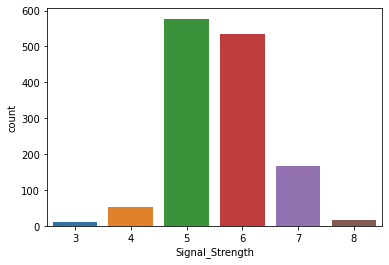

In [10]:
sns.countplot(df['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()


class 5.0 in 'Signal_Strength' has the highest count.
Class 8,3 has low distriburtion 
Have 6 unique target values



E. Share insights from the initial data analysis (at least 2)

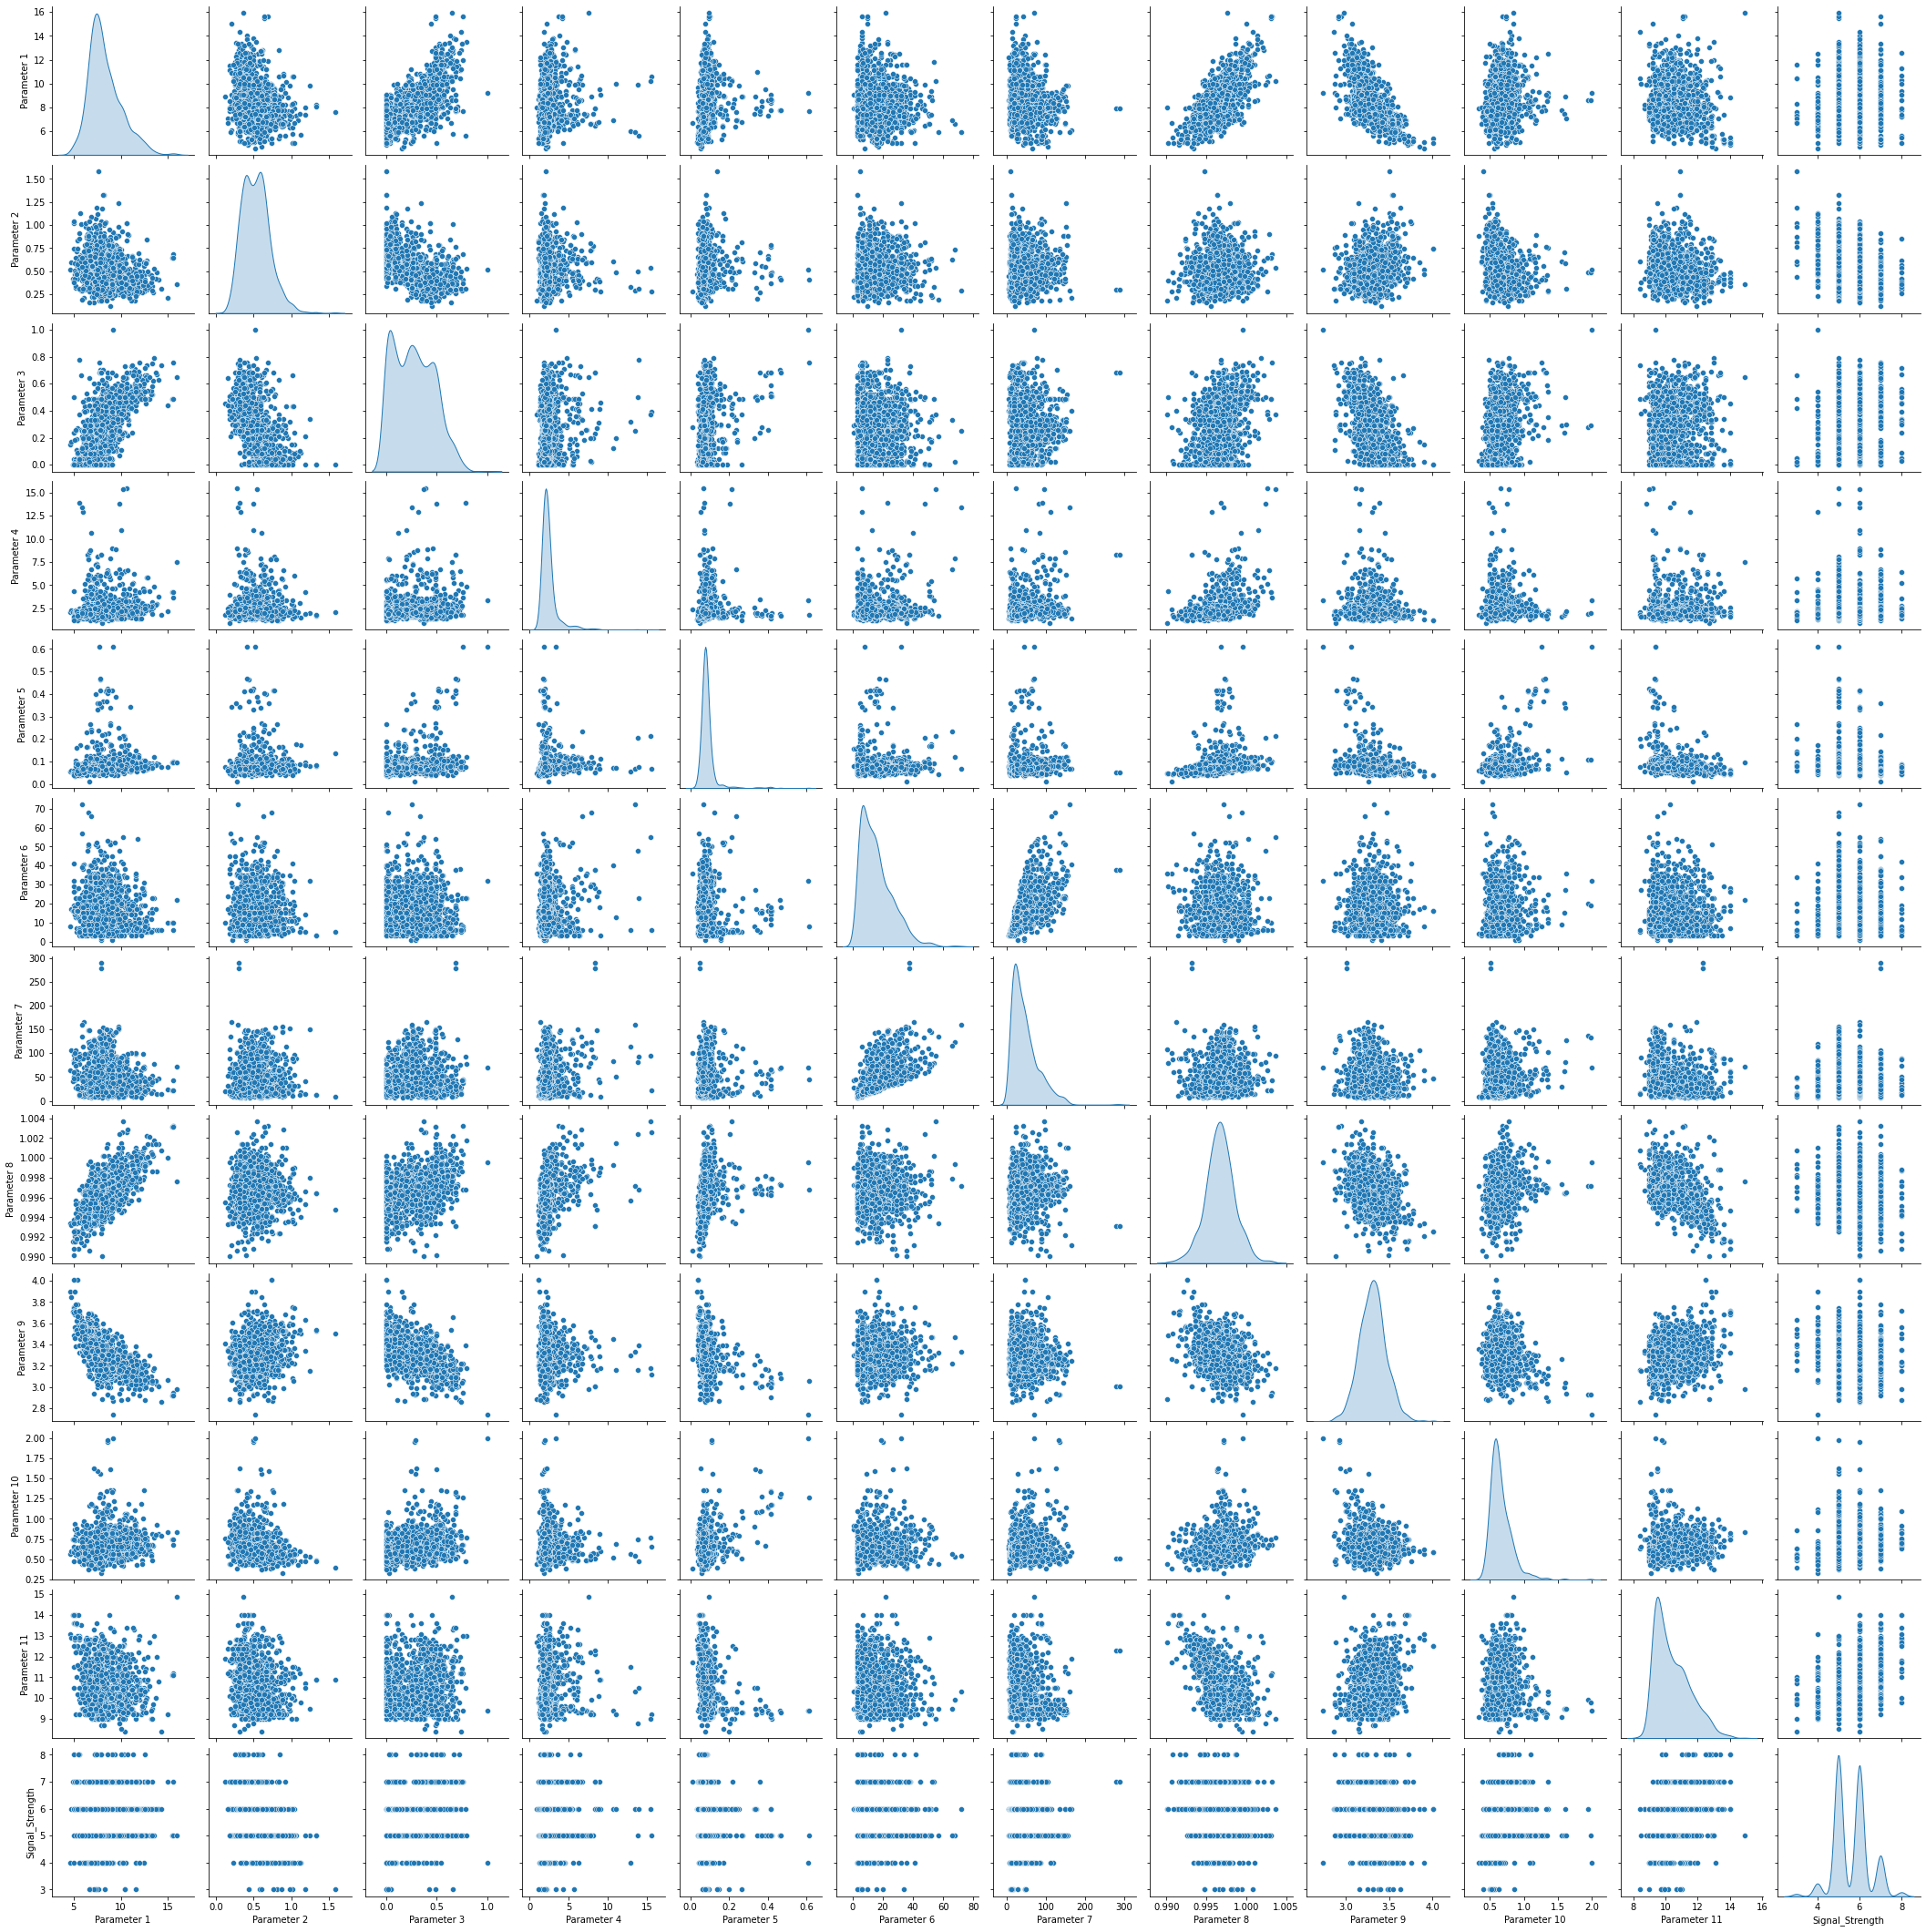

In [11]:
#plt.figure(figsize = (50,50))
sns.pairplot(df,diag_kind='kde')
plt.show()

Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9
Parameter 6 and 7 are highly correlated. But since, the correlation is not too high near 0.8 or above not dropping the features.

2. Data preprocessing 

A. Split the data into X & Y.

In [12]:
X = df.drop("Signal_Strength", axis=1)
y = df['Signal_Strength']

B. Split the data into train & test with 70:30 proportion

In [13]:
# splitting to create training and test data
X_Train, X_val_and_test, y_Train, Y_val_and_test = train_test_split(X, y, test_size=.30, random_state=7)

C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [14]:
print(X_Train.shape)
print(X_val_and_test.shape)
print(y_Train.shape)
print(Y_val_and_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [15]:
print(type(X_Train))

<class 'pandas.core.frame.DataFrame'>


D. Normalise the train and test data with appropriate method.

In [16]:
X_Train_s =StandardScaler().fit_transform(X_Train)
X_val_and_test_s =StandardScaler().fit_transform(X_val_and_test)

In [17]:
print(X_Train.shape)
print(X_val_and_test.shape)
print(y_Train.shape)
print(Y_val_and_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


E. Transform Labels into format acceptable by Neural Network

In [18]:
label_encoder = preprocessing.LabelEncoder()
y_Train_e= label_encoder.fit_transform(y_Train)
Y_val_and_test_e= label_encoder.fit_transform(Y_val_and_test)

In [19]:
print(X_Train.shape)
print(X_val_and_test.shape)
print(y_Train.shape)
print(Y_val_and_test.shape)
print(y_Train_e.shape)
print(Y_val_and_test_e.shape)

(951, 11)
(408, 11)
(951,)
(408,)
(951,)
(408,)


In [20]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test_s, Y_val_and_test_e, test_size=0.5)


3. Model Training & Evaluation using Neural Network 

A. Design a Neural Network to train a classifier. 

In [21]:
# Initializing the ANN
model = Sequential()
model.add(Dense(activation = 'relu', input_dim = 11, units=32))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'sigmoid')) 


In [22]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


B.Train the classifier using previously designed Architecture

In [24]:
# Compile the model
hist = model.fit(X_Train_s, y_Train_e,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))



Epoch 1/100
30/30 [==============================] - 1s 10ms/step - loss: -2.3886 - accuracy: 0.0431 - val_loss: -7.1230 - val_accuracy: 0.0196
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: -38.5362 - accuracy: 0.0442 - val_loss: -201.1343 - val_accuracy: 0.0196
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0336 - val_loss: nan - val_accuracy: 0.0049
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0084 - val_loss: nan - val_accuracy: 0.0049
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0084 - val_loss: nan - val_accuracy: 0.0049
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0084 - val_loss: nan - val_accuracy: 0.0049
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0084 - val_loss: nan - val_accuracy: 0.0049
Epoch 8/100
30/30 [================

In [25]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0049


0.0049019609577953815

3.C. Plot 2 separate visuals. 

i. Training Loss and Validation Loss

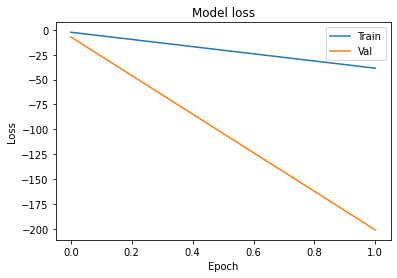

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()



ii Training Accuracy and Validation Accuracy

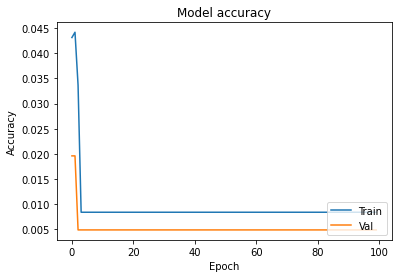

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

D. Design new architecture/update existing architecture in attempt to improve the performance of the model. 

In [30]:
#ANN with Batch Normalization
model_1 = Sequential()
# Input Layer
#Adding Input layer and activation functions ReLU
model_1.add(Dense(activation = 'relu', input_dim = 11, units=32))
#Adding BatchNormalization Layer
model_1.add(Dense(32, activation='relu'))
model_1.add(BatchNormalization())
#Adding Activation function
model_1.add(Dense(1, activation = 'sigmoid')) 

In [31]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
hist_2 = model_1.fit(X_Train_s, y_Train_e,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))



Epoch 1/100
30/30 [==============================] - 3s 10ms/step - loss: 0.3572 - accuracy: 0.0179 - val_loss: 1.3905 - val_accuracy: 0.0049
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: -0.5309 - accuracy: 0.0179 - val_loss: 0.7035 - val_accuracy: 0.0049
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: -1.3571 - accuracy: 0.0200 - val_loss: -0.0316 - val_accuracy: 0.0049
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: -2.3432 - accuracy: 0.0221 - val_loss: -0.9147 - val_accuracy: 0.0049
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: -3.5904 - accuracy: 0.0221 - val_loss: -2.3222 - val_accuracy: 0.0049
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: -5.1826 - accuracy: 0.0210 - val_loss: -3.9183 - val_accuracy: 0.0049
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: -7.0410 - accuracy: 0.0189 - val_loss: -5.7744 - val_accuracy: 0.0049
E

E. Plot visuals as in Q3.C and share insights about difference observed in both the models. 

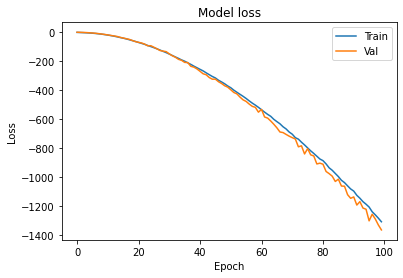

In [33]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

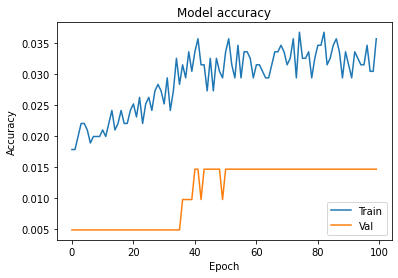

In [34]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Observation : 
Nomalization increased Accuracy 
